In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv("wage_regularization.csv")

In [4]:
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


**important**: we need to normalize the features before training the models. Why? 


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# Standardize all the variables using StandarScaler() class from sklearn package.
# With the standardized variables, make a new data frame and call it df_sc.
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc

array([[-0.46751952, -0.66885143, -0.681389  , ..., -0.70895446,
        -0.72303072, -0.73357606],
       [-0.37101938,  2.06403752,  2.2236843 , ...,  1.29793053,
         1.31081019,  1.32021092],
       [-0.32895523,  0.24211155,  0.1578544 , ..., -0.11772087,
        -0.16164066, -0.20360711],
       ...,
       [-1.03909722, -0.66885143, -0.681389  , ..., -1.46305145,
        -1.38383005, -1.30957655],
       [-0.21018583, -0.66885143, -0.681389  , ..., -1.46305145,
        -1.38383005, -1.30957655],
       [ 0.10405818, -0.66885143, -0.681389  , ...,  0.54970162,
         0.51165088,  0.4716505 ]])

In [7]:
df.describe()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
count,9.350000e+02,935.000000,935.000000,935.000000,935.000000,9.350000e+02,935.000000,935.000000,935.00000,9.350000e+02,9.350000e+02
mean,9.579455e+05,13.468449,186.219251,2643.720856,38516.721925,5.751197e+05,33.080214,1103.948663,37160.73369,1.261474e+06,4.317175e+07
std,4.043608e+05,2.196654,61.993732,1340.538368,26273.534179,4.914620e+05,3.107803,206.922193,10400.77792,4.676613e+05,1.983487e+07
min,1.150000e+05,9.000000,81.000000,729.000000,6561.000000,5.904900e+04,28.000000,784.000000,21952.00000,6.146560e+05,1.721037e+07
25%,6.690000e+05,12.000000,144.000000,1728.000000,20736.000000,2.488320e+05,30.000000,900.000000,27000.00000,8.100000e+05,2.430000e+07
50%,9.050000e+05,12.000000,144.000000,1728.000000,20736.000000,2.488320e+05,33.000000,1089.000000,35937.00000,1.185921e+06,3.913539e+07
75%,1.160000e+06,16.000000,256.000000,4096.000000,65536.000000,1.048576e+06,36.000000,1296.000000,46656.00000,1.679616e+06,6.046618e+07
max,3.078000e+06,18.000000,324.000000,5832.000000,104976.000000,1.889568e+06,38.000000,1444.000000,54872.00000,2.085136e+06,7.923517e+07


In [8]:
df.columns

Index(['wage', 'educ', 'educ2', 'educ3', 'educ4', 'educ5', 'age', 'age2',
       'age3', 'age4', 'age5'],
      dtype='object')

In [9]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467520,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
1,-0.371019,2.064038,2.223684,2.379630,2.530868,2.675999,1.261947,1.281608,1.297931,1.310810,1.320211
2,-0.328955,0.242112,0.157854,0.074845,-0.003836,-0.075928,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
3,-0.761969,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.347767,-0.386577,-0.422573,-0.455483,-0.485129
4,-0.979713,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,0.296119,0.251685,0.206178,0.160164,0.114187


###  Splitting the data

In [10]:
# Define your feature space and target variables and then split the data into test (20%) and train set (80%)

y = df_sc['wage']
X = df_sc.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
932,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-1.635539,-1.547054,-1.463051,-1.383830,-1.309577
82,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,1.261947,1.281608,1.297931,1.310810,1.320211
370,1.608556,1.658809,1.693718,1.713830,1.719745,1.583890,1.644257,1.703790,1.762179,1.819156
452,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,0.940004,0.928630,0.913427,0.894592,0.872387
132,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576


In [39]:
# As a benchmark, use sm.OLS() function from statsmodel.api package to run the linear regression model
# on the train set.
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_wc).fit()
model.summary(b)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.81
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.83e-17
Time:                        12:18:15   Log-Likelihood:                -1016.0
No. Observations:                 748   AIC:                             2054.
Df Residuals:                     737   BIC:                             2105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.035     -0.080      0.937      -0.071       0.065
educ        -109.9917    192.003     -0.573      0.567    -486.931     266.947
educ2        462.5622    824.114      0.561      0.575   -1155.328    2080.452
educ3       -736.3809   1339.181     -0.550      0.583   -3365.445    1892.684
educ4        527.4761    974.843      0.541      0.589   -1386.323    2441.276
educ5       -143.4145    267.848     -0.535      0.593    -669.250     382.421
age        -1295.3370   4397.692     -0.295      0.768   -9928.834    7338.160
age2        5164.4620   1.79e+04      0.289      0.773   -2.99e+04    4.03e+04
age3       -7783.0117   2.73e+04     -0.285      0.776   -6.15e+04    4.59e+04
age4        5255.0538   1.87e+04      0.282      0.778   -3.14e+04    4.19e+04
age5       -1341.0610   4794.082     -0.280      0.780   -1.08e+04    8070.622
==============================================================================
Omnibus:                      202.208   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.255
Skew:                           1.286   Prob(JB):                    1.40e-142
Kurtosis:                       6.787   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# From the summary report, What is the R-squared of the model in train set?
print(model.rsquared)

0.12792312252530325


In [ ]:
# Are any of the features statistically significant at 5% level? (2 points)

----

# A) Training the models 

In this section we will train 4 different models:
1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [12]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [42]:
# From sklearn.linear_model import the relevant functions for Linear Regression,
# Ridge, Lasso and ElasticNet regression functions.

model_linear = LinearRegression()
model_ridge = Ridge(0)
model_lasso = Lasso(0)
model_net = ElasticNet(0)

In [14]:
# Train all the 4 models with the default features. (5 points)
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [15]:
# Save the predicted values for the test set in y_hat_linear, y_hat_ridge, y_hat_lasso and y_hat_net.
# Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous part
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.267175,-0.201887,-0.201887
238,1.910343,0.699718,0.699738,0.690517,0.690517
531,-0.700110,-0.065042,-0.065050,0.040769,0.040769
157,2.328510,0.689508,0.689509,0.642706,0.642706
601,1.341239,0.208652,0.208633,0.169808,0.169808


### coefficients

In [16]:
df.drop('wage', axis=1, inplace=False).columns

Index(['educ', 'educ2', 'educ3', 'educ4', 'educ5', 'age', 'age2', 'age3',
       'age4', 'age5'],
      dtype='object')

In [17]:
# Estimate the coefficients from each model and stack them all along with the feature
# names in a new data frame named coefficients.

coefficients = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,educ,-109.991745,-109.994342,0.055649,0.055649
1,educ2,462.562174,462.573519,0.556008,0.556008
2,educ3,-736.380870,-736.399649,0.180667,0.180667
3,educ4,527.476085,527.489994,-0.126316,-0.126316
4,educ5,-143.414487,-143.418367,-0.365808,-0.365808
5,age,-1295.337039,-1296.956931,-0.069215,-0.069215
6,age2,5164.461990,5171.047399,0.301351,0.301351
7,age3,-7783.011661,-7793.087898,0.134377,0.134377
8,age4,5255.053777,5261.929836,-0.024705,-0.024705
9,age5,-1341.061043,-1342.826388,-0.173421,-0.173421


In [ ]:
# Why do you think all the coefficients of Lasso and ElasticNet models are zero? (5 points)

## Cross Validation 

#### 1) Optimal alpha for Ridge regression

In [ ]:
# Use cross validation to find the optimal hyper parameters (alphas) for the penalized regression models.
# Save these optimal alphas in a new object. you need to use them in next part.

In [31]:
ridgecv = RidgeCV(alphas=alpha_ridge)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

12.91549665014884

In [43]:
alpha_ridge_opt = ridgecv.alpha_

----

#### 2) Optimal alpha for Lasso regression

In [33]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.010732138475800224

In [34]:
alpha_lasso_opt = lassocv.alpha_

----

#### 3) Optimal alpha for Elastic Net regression

In [35]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.010682821217946607

In [36]:
elasticnetcv.l1_ratio_

0.5

In [37]:
alpha_elasticnet_opt = elasticnetcv.alpha_

----

## Refit the models


In [44]:
# Now go back to part 4, copy codes from cells in part 4.1, 4.2 and 4.3. # You need to refit the models using 
# the optimal hyper parameters (alphas) that you obtained from cross validation #in part 5. 
# However, name your final predictions data frame as df_predictions_optimal  

In [45]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha_ridge_opt)
model_lasso = Lasso(alpha_lasso_opt)
model_net = ElasticNet(alpha_elasticnet_opt)

In [46]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [47]:
df_predictions_optimal = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions_optimal.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.209582,-0.213254,-0.214806
238,1.910343,0.699718,0.765812,0.808387,0.809270
531,-0.700110,-0.065042,0.052529,0.023871,0.037489
157,2.328510,0.689508,0.710131,0.761422,0.757606
601,1.341239,0.208652,0.165143,0.155527,0.158446


### Performance in the test set

In [57]:
# Use the variables in df_predictions_optimal to report the RMSE_test (RMSE in the test set) for all the 4 models.
# Rank the models based on their performance in the test set.

In [50]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.865

In [54]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

0.8671

In [55]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.868

In [56]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.868

In [58]:
# Were you able to beat the simple linear model? What does this mean?

### Plotting the regression coefficients vs alphas:

#### 1) Ridge regression coefficients vs alpha

In [74]:
# Plot the coefficients vs alphas for each of the penalized regression models. How do you interpret each of them?

In [22]:
alpha_ridge_opt = 10**np.linspace(0,5,100)

In [62]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge_opt:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 10)

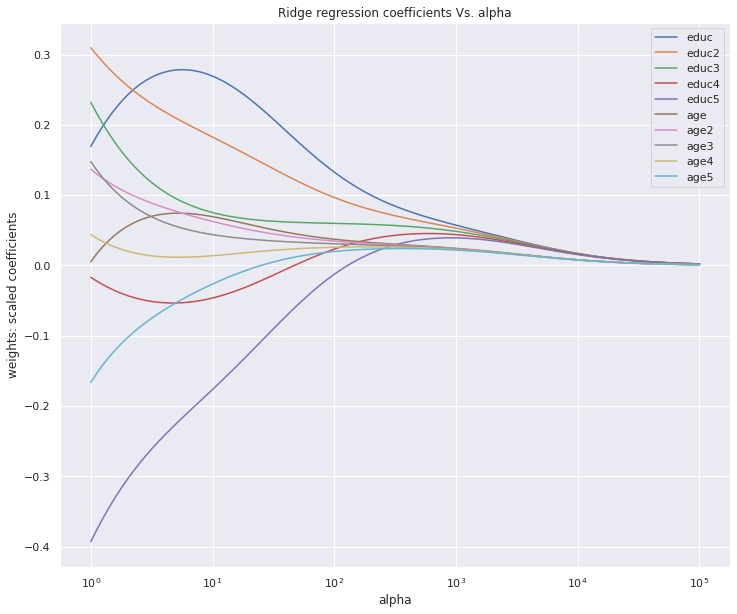

In [66]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

---

#### 2) Lasso regression coefficients vs alpha

In [68]:
alpha_lasso_opt = 10**np.linspace(-3,1,100)

In [69]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso_opt:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 10)

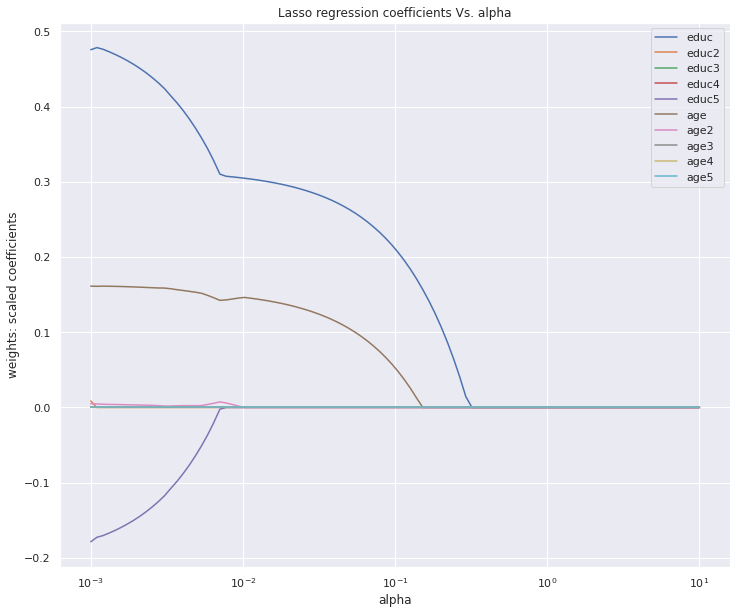

In [70]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso_opt, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

**Challenge**: Which coefficients survive when alpha = 0.1? 

---

#### 3) Elastic Net regression coefficients vs alpha

In [71]:
alpha_elasticnet_opt = 10**np.linspace(-3,1,100)

In [72]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet_opt:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 10)

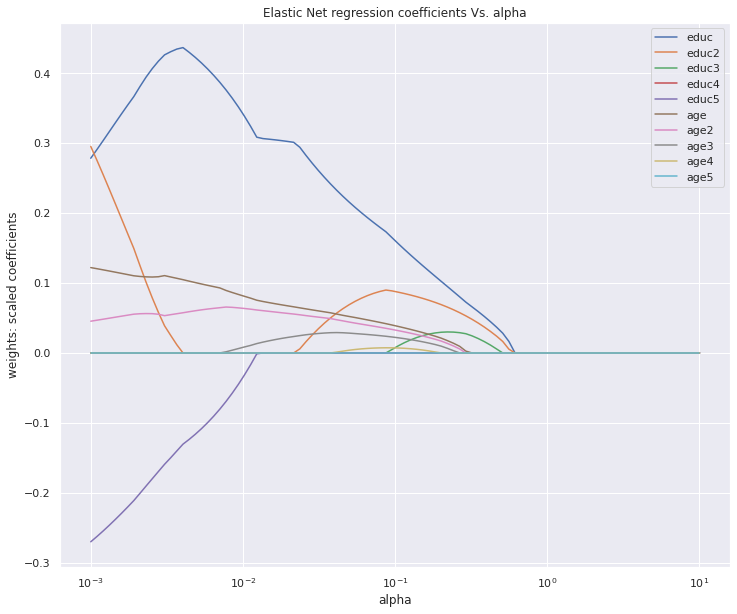

In [73]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet_opt, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

In [ ]:
# From the 3 plots you generated in part 8, answer the following questions: (15 points)
# Ridge regression plot: Which coefficients drop most significantly when alpha increases from 0.0001 to 10. (name the top two) (5 points)
# Lasso regression plot: What are the top 2 variables that survive when alpha=0.1? (5 points)
# From the Lasso plot and ElasticNet plot, why the magnitude of Lasso coefficients are larger than the ElasticNet coefficients for alpha=0.0001? (5 points)